lines = [[[789.           0.8901179 ]]

 [[687.           0.8901179 ]]

 [[690.           0.87266463]]

 [[785.           0.9075712 ]]

 [[692.           0.9075712 ]]]
t = 0
degree = 0.0


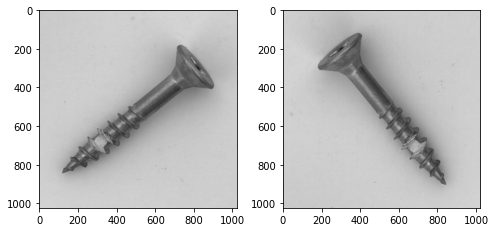

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import ndimage

img = cv2.imread("archive/train/not-good/thread_top006.png") #13
blurred = cv2.GaussianBlur(img,(11,11),0)
gaussImg = cv2.Canny(blurred,10,70)

lines = cv2.HoughLines(gaussImg,1,np.pi/180,150)
print('lines = {}'.format(lines))

for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

# for line in lines:
#     for rho,theta in line:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))

#         img = cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

if x1 != x2 and y1 != y2:
    t = float(y2 - y1)/(x2 - x1)
else:
    t = 0
print('t = {}'.format(t))
rotate_angle = math.degrees(math.atan(t))
print('degree = {}'.format(rotate_angle))

if rotate_angle > 45:
    rotate_angle = -90 + rotate_angle
else:
    rotate_angle = 90 + rotate_angle 

rotated_image = ndimage.rotate(img,rotate_angle)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(rotated_image)
plt.show()

In [33]:
print(cv2.__version__)

4.6.0


In [3]:
!python train.py

Traceback (most recent call last):
  File "/Users/dio/Desktop/assignment/assignment-ai/train.py", line 3, in <module>
    from data.dataprocess import rotateImage
  File "/Users/dio/Desktop/assignment/assignment-ai/data/dataprocess.py", line 1, in <module>
    import torch.utils.data as data
ModuleNotFoundError: No module named 'torch'


In [46]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from scipy import ndimage
# class Dataset(data.Dataset):


def pre_process_images(basic_dir):
    original_dataset_train_dir = os.path.join(basic_dir, "archive/train")
    print('original train dir = {}'.format(original_dataset_train_dir))

    image_dir = os.path.join(basic_dir, "images")
    if not os.path.exists(image_dir):
        os.mkdir(image_dir)

    DIR_GOOD = 'good'
    DIR_NOT_GOOD = 'not-good'
    DIR_TRAIN = 'train'
    DIR_VALIDATE = 'validate'

    total_good = len(os.listdir(os.path.join(
        original_dataset_train_dir, DIR_GOOD)))
    shuffled_indeces = np.random.permutation(total_good)
    train_good_idx = shuffled_indeces[:int(0.8*total_good)]
    val_good_idx = shuffled_indeces[int(0.8*total_good):]
    #
    total_not_good = len(os.listdir(os.path.join(
        original_dataset_train_dir, DIR_NOT_GOOD)))
    shuffled_indeces = np.random.permutation(total_not_good)
    train_not_good_idx = shuffled_indeces[:int(0.8*total_not_good)]
    val_not_good_idx = shuffled_indeces[int(0.8*total_not_good):]
    #
    dic = {DIR_TRAIN: {DIR_GOOD: train_good_idx, DIR_NOT_GOOD: train_not_good_idx},
           DIR_VALIDATE: {DIR_GOOD: val_good_idx, DIR_NOT_GOOD: val_not_good_idx}}
    #

    for sub_dir in dic.keys():
        dir = os.path.join(image_dir, sub_dir)
        if not os.path.exists(dir):
            os.mkdir(dir)
        sub_dict = dic[sub_dir]
        for condiction_dir in sub_dict.keys():
            sub_condiction = os.path.join(dir, condiction_dir)
            if not os.path.exists(sub_condiction):
                os.mkdir(sub_condiction)
            original_sub_condicton = os.path.join(
                original_dataset_train_dir, condiction_dir)
            list_dir = os.listdir(original_sub_condicton)
            for index, file in enumerate(list_dir):
                print(file)
                src_dir = os.path.join(original_sub_condicton, file)
                des_dir = os.path.join(sub_condiction, file)
                if index in sub_dict[condiction_dir]:
                    shutil.copyfile(src_dir, des_dir)

pre_process_images('/Users/dio/Desktop/assignment/assignment-ai')

original train dir = /Users/dio/Desktop/assignment/assignment-ai/archive/train
subdir = train condiction = good 
ok190.png
ok184.png
ok153.png
ok147.png
ok027.png
ok033.png
ok225.png
ok231.png
ok219.png
ok218.png
ok230.png
ok224.png
ok032.png
ok026.png
ok146.png
ok152.png
ok185.png
ok191.png
ok187.png
ok193.png
ok144.png
ok150.png
ok178.png
ok030.png
ok024.png
ok018.png
ok232.png
ok226.png
ok227.png
ok233.png
ok019.png
ok025.png
ok031.png
ok179.png
ok151.png
ok145.png
ok192.png
ok186.png
ok182.png
ok196.png
ok169.png
ok141.png
ok155.png
ok009.png
ok035.png
ok021.png
ok237.png
ok223.png
ok222.png
ok236.png
ok020.png
ok034.png
ok008.png
ok154.png
ok140.png
ok168.png
ok197.png
ok183.png
ok195.png
ok181.png
ok156.png
ok142.png
ok022.png
ok036.png
ok208.png
ok220.png
ok234.png
ok235.png
ok221.png
ok209.png
ok037.png
ok023.png
ok143.png
ok157.png
ok180.png
ok194.png
ok130.png
ok124.png
ok118.png
ok087.png
ok093.png
ok044.png
ok050.png
ok078.png
ok246.png
ok247.png
ok079.png
ok051.png
ok045.p

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import ndimage

def loader(path):
    img = cv2.imread(path)
    blurred = cv2.GaussianBlur(img,(11,11),0)
    gaussImg = cv2.Canny(blurred,10,70)

    lines = cv2.HoughLines(gaussImg,1,np.pi/180,150)

    for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

    # for line in lines:
    #     for rho,theta in line:
    #         a = np.cos(theta)
    #         b = np.sin(theta)
    #         x0 = a*rho
    #         y0 = b*rho
    #         x1 = int(x0 + 1000*(-b))
    #         y1 = int(y0 + 1000*(a))
    #         x2 = int(x0 - 1000*(-b))
    #         y2 = int(y0 - 1000*(a))

    #         img = cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

    if x1 != x2 and y1 != y2:
        t = float(y2 - y1)/(x2 - x1)
    else:
        t = 0
    rotate_angle = math.degrees(math.atan(t))

    if rotate_angle > 45:
        rotate_angle = -90 + rotate_angle
    else:
        rotate_angle = 90 + rotate_angle 

    rotated_image = ndimage.rotate(img,rotate_angle)

    return rotated_image

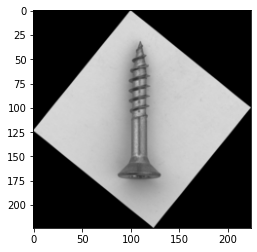

Label is: 0


In [7]:
from torchvision import datasets
from torchvision import transforms
import torch
from torch.utils import data
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

transform =   transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        
])

BATCH_SIZE = 5

train_dataset = datasets.ImageFolder(root='./images/train',
                                     transform=transform,
                                     loader=loader)  
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                               )

validate_dataset = datasets.ImageFolder(root='./images/validate',
                                        transform=transform,
                                        loader=loader)
validate_loader = data.DataLoader(validate_dataset, batch_size=BATCH_SIZE, shuffle=True)


if __name__ == '__main__':
    image, label = iter(validate_loader).next()  # iter()函数把train_loader变为迭代器，然后调用迭代器的next()方法
    sample = image[0].squeeze()
    sample = sample.permute((1, 2, 0)).numpy()
    sample = np.clip(sample, 0, 1)
    plt.imshow(sample)
    plt.show()
    print('Label is: {}'.format(label[0].numpy()))


In [ ]:
def save_networks(self, which_epoch, device):
    # for name in self.model_names:
    # if isinstance(name, str):
    save_filename = "net_%s.pth" % (which_epoch)
    save_path = os.path.join(self.save_dir, save_filename).replace(
        "\\", "/"
    )
    net = getattr(self, "net")
    optimize = getattr(self, "optimizer")

    if torch.cuda.is_available():
        torch.save(
            {
                "net": net.module.cpu().state_dict(),
                "optimize": optimize.state_dict(),
            },
            save_path,
        )
        net.to(device)


In [9]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time
from torch.optim import lr_scheduler
from torch.utils.tensorboard import SummaryWriter

device = "cuda" if torch.cuda.is_available() else "cpu"
model_ft = models.vgg16(pretrained=True)
model_ft.classifier[-1] = nn.Linear(in_features=4096, out_features=2)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#
checkpoint_dir = os.path.join(
    '/Users/dio/Desktop/assignment/assignment-ai', 'checkpoints')
writer = SummaryWriter(log_dir=checkpoint_dir)

global_steps = 0
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            global_steps += BATCH_SIZE
            # Iterate over data.
            for inputs, labels in train_loader if phase == 'train' else validate_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                print('pred = {} labels = {}'.format(preds, labels.data))
                running_corrects += torch.sum(preds == labels.data)

                if global_steps % BATCH_SIZE == 0:
                    if phase == 'train':
                        writer.add_scalar('Loss/train', running_loss, global_steps)
                    else:
                        writer.add_scalar('Loss/val', running_loss, global_steps)

                    
            if phase == 'train':
                scheduler.step()
            dataset_sizes = len(train_dataset) if phase == 'train' else len(
                validate_dataset)
            epoch_loss = running_loss / dataset_sizes
            epoch_acc = running_corrects.double() / dataset_sizes
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # deep copy the model
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    # load best model weights
    # model.load_state_dict(best_model_wts)
    return model


model_ft = train_model(model_ft, criterion, optimizer_ft,
                       exp_lr_scheduler,
                       num_epochs=10)


Epoch 0/9
----------
pred = tensor([1, 0, 1, 1, 1]) labels = tensor([0, 0, 0, 1, 0])
pred = tensor([0, 0, 0, 0, 0]) labels = tensor([0, 0, 0, 0, 0])
pred = tensor([0, 0, 0, 0, 0]) labels = tensor([0, 0, 0, 0, 0])
pred = tensor([0, 0, 0, 0, 0]) labels = tensor([0, 1, 0, 0, 0])


KeyboardInterrupt: 